In [53]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [50]:
def validation(model, X_valid, y_valid):
    if model == catc:
        #model.set_probability_threshold(0.495)
        model_valid = model.predict(X_valid)
        model_valid_ = model.predict_proba(valid[features])[:, 1]
        #model_valid = (model.predict_proba(valid[features])[:, 1]>= threshold).astype(int)
    elif model == lgbc:
        model_valid = model.predict(X_valid)
        model_valid_ = model.predict_proba(valid[features])[:, 1]
    #расчет метрики
    print("f1_macro: ", f1_score(y_valid, model_valid, average='macro'))
    print("roc_auc: ", roc_auc_score(y_valid, model_valid_, average='macro'))  #'weighted'
    print("Отчет о классификации: ")
    print(classification_report(y_valid, model_valid))
    #матрица ошибок
    print("Матрица ошибок: ")
    cm = confusion_matrix(y_valid, model_valid)#, normalize='true'
    cm_display = ConfusionMatrixDisplay(cm).plot(colorbar=False, cmap="GnBu")

    fig, ax = plt.subplots(figsize=(8, 6))
    if model == catc:
        #влияющие факторы
        fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X_valid.columns})
        fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
        #fea_imp.plot(kind='barh', x='col', y='imp', figsize=(8, 6), legend=None)
        ax.barh(fea_imp['col'], fea_imp['imp'], align='center')
        
    elif model == lgbc:
        #model.plot_importance(lgbc, max_num_features=20, height=0.8, ax=ax)
        fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X_valid.columns})
        fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
        #fea_imp.plot(kind='barh', x='col', y='imp', figsize=(8, 6), legend=None)
        ax.barh(fea_imp['col'], fea_imp['imp'], align='center')
        
    plt.title('Важность признаков для модели')   
    plt.ylabel('Признаки')
    plt.xlabel('Важность')

In [2]:
region=pd.read_csv('data/df_region.csv')

In [3]:
df_time=pd.read_csv('data/df_time.csv')

In [37]:
df_meteo=pd.read_csv('data/df_meteo.csv')

In [38]:
y_train=pd.read_csv('data/y_train.csv')

In [39]:
y_train

,district,datetime,is_dtp,is_transport,is_fire,is_toxic,is_bio,is_nature,is_zkh,is_etc
0,ГО город Березники,2012-12-18 20:00:00,0,0,1,0,0,0,0,0
1,Пермский МО,2012-12-31 23:00:00,0,0,0,0,1,0,0,0
2,Юрлинский МО,2012-12-31 23:00:00,0,0,0,0,1,0,0,0
3,Карагайский МО,2012-12-31 23:00:00,0,0,0,0,1,0,0,0
4,Добрянский ГО,2013-01-01 08:00:00,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3649,Пермский ГО,2022-12-08 11:00:00,0,1,0,0,0,0,0,0
3650,Пермский ГО,2022-12-16 17:00:00,0,0,1,0,0,0,0,0
3651,Пермский МО,2022-12-25 20:00:00,1,0,0,0,0,0,0,0
3652,Пермский ГО,2022-12-28 11:00:00,0,0,0,1,0,0,0,0


In [40]:
#фичи по регионам и по времени
distric_list = region.district.unique().tolist()

dataframes = []
for distric in distric_list:
    temp = df_time.copy()
    temp['district']=distric
    dfn = temp.merge(region)
    dataframes.append(dfn)
result = pd.concat(dataframes)

In [41]:
df_train = result.merge(df_meteo)
df_train

,datetime,date,year,quarter,month,dayofyear,dayofmonth,dayofweek,week,weekend,...,U,DD,Ff,N,H,VV,Td,RRR,tR,Tg
0,2013-01-01 02:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,86.0,"Штиль, безветрие",0.0,60,2750,20.0,-15.2,0.0,NaN,NaN
1,2013-01-01 05:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,90.0,"Штиль, безветрие",0.0,60,2750,20.0,-15.1,0.0,NaN,NaN
2,2013-01-01 08:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,89.0,"Ветер, дующий с северо-запада",1.0,75,2750,20.0,-16.6,0.0,12.0,NaN
3,2013-01-01 11:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,87.0,"Ветер, дующий с северо-запада",1.0,75,2750,50.0,-18.3,0.0,NaN,NaN
4,2013-01-01 14:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,86.0,"Штиль, безветрие",0.0,40,2750,50.0,-20.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080750,2022-12-30 11:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,85.0,"Ветер, дующий с запада",1.0,60,2250,20.0,-17.8,0.0,NaN,NaN
1080751,2022-12-30 14:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,87.0,"Ветер, дующий с юго-востока",2.0,50,2750,20.0,-15.4,0.0,NaN,NaN
1080752,2022-12-30 17:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,85.0,"Ветер, дующий с юго-востока",4.0,60,2250,20.0,-16.0,0.0,NaN,NaN
1080753,2022-12-30 20:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,82.0,"Ветер, дующий с юго-востока",1.0,0,800,20.0,-18.9,0.0,12.0,NaN


In [42]:
df = df_train.merge(y_train, on=['datetime', 'district'], how='left')
df

,datetime,date,year,quarter,month,dayofyear,dayofmonth,dayofweek,week,weekend,...,tR,Tg,is_dtp,is_transport,is_fire,is_toxic,is_bio,is_nature,is_zkh,is_etc
0,2013-01-01 02:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 05:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 08:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 11:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 14:00:00,2013-01-01,2013,1,1,1,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080819,2022-12-30 11:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080820,2022-12-30 14:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080821,2022-12-30 17:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080822,2022-12-30 20:00:00,2022-12-30,2022,4,12,364,30,5,52,0,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
col = ['is_dtp', 'is_transport', 'is_fire', 'is_toxic', 'is_bio', 'is_nature', 'is_zkh', 'is_etc']
df[col]=df[col].fillna(0).astype(int)

In [44]:
features = ['year', 'quarter', 'month', 'dayofyear',
       'dayofmonth', 'dayofweek', 'week', 'weekend', 'season', 'week_of_month',
       'decades', 'half_of_day', 'third_of_day', 'quarter_of_day', 'hour',
       'part_of_day', 'is_holiday', 'is_preholiday', 'darktime', 'daytime',
       'sunrise_hour', 'sunset_hour', 'diff', 'district',
       'population', 'area', 'is_city_center', 'density',
       'Сетей теплоснабжения', 'Сетей холодного водоснабжения',
       'Сетей горячего водоснабжения', 'Сетей электроснабжения',
       'Сети газоснабжения', 'Станций водоподготовки', 'Водонасосных объектов',
       'Объектов водозабора', 'Сетей водоотведения',
       'Очистных сооружений канализации', 'Канализационных насосных станций',
       'Котельных', 'Тепловых пунктов', 'T', 'Po', 'P', 'U', 'DD', 'Ff', 'N',
       'H', 'VV', 'Td', 'RRR', 'tR', 'Tg',]

cat_col=['year', 'quarter', 'month', 'dayofyear',
       'dayofmonth', 'dayofweek', 'week', 'season', 'week_of_month',
       'decades', 'half_of_day', 'third_of_day', 'quarter_of_day', 'hour',
       'part_of_day',  'district', 'DD', ]

In [45]:
train_part = df.query('datetime < "2022-01-01"')
valid = df.query('datetime >= "2022-01-01"')

In [46]:
target_col = ['is_dtp', 'is_transport', 'is_fire', 'is_toxic', 'is_bio', 'is_nature', 'is_zkh', 'is_etc']
X_train_part = train_part[features]
X_valid = valid[features]
y_train_part = train_part[target_col].astype(int)
y_valid = valid[target_col].astype(int)

In [ ]:
df[features].info()

In [99]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_dtp'], eval_set=(X_valid, y_valid['is_dtp']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7144447	best: 0.7144447 (0)	total: 197ms	remaining: 9m 49s
bestTest = 0.8136479259
bestIteration = 169
Shrink model to first 170 iterations.


f1_macro:  0.49705491696055026
roc_auc:  0.8136476162904054
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    120895
           1       0.00      0.07      0.00        14

    accuracy                           0.99    120909
   macro avg       0.50      0.53      0.50    120909
weighted avg       1.00      0.99      0.99    120909

Матрица ошибок: 


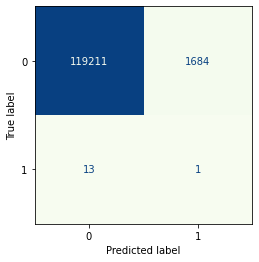

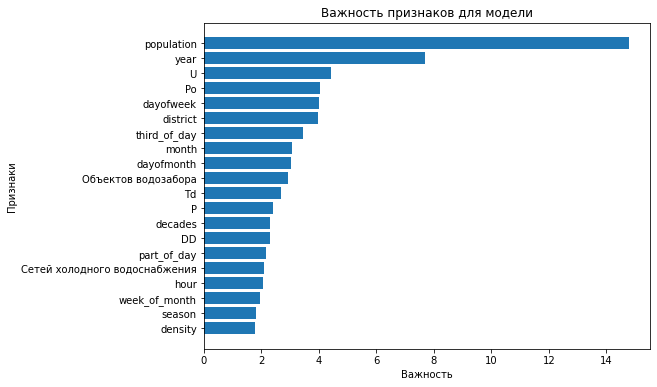

In [100]:
validation(catc, X_valid, y_valid['is_dtp'])

In [101]:
dtp_prediction = catc.predict_proba(X_valid)[:, 1]

In [102]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_transport'], eval_set=(X_valid, y_valid['is_transport']), 
         cat_features=cat_col, early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7012183	best: 0.7012183 (0)	total: 199ms	remaining: 9m 57s
bestTest = 0.9046185613
bestIteration = 16
Shrink model to first 17 iterations.


f1_macro:  0.4944479515803199
roc_auc:  0.9046185403295176
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    120904
           1       0.00      0.20      0.00         5

    accuracy                           0.98    120909
   macro avg       0.50      0.59      0.49    120909
weighted avg       1.00      0.98      0.99    120909

Матрица ошибок: 


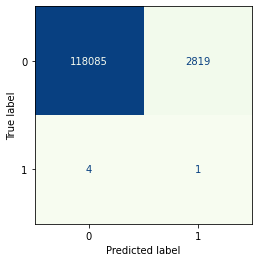

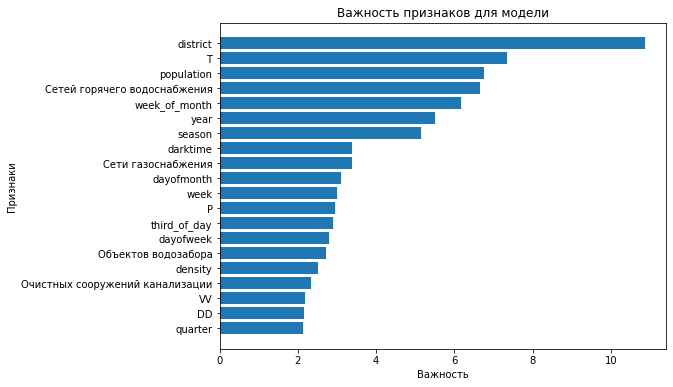

In [103]:
validation(catc, X_valid, y_valid['is_transport'])

In [104]:
transp_prediction = catc.predict_proba(X_valid)[:, 1]

In [105]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_fire'], eval_set=(X_valid, y_valid['is_fire']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7523838	best: 0.7523838 (0)	total: 200ms	remaining: 9m 59s
bestTest = 0.8142451048
bestIteration = 68
Shrink model to first 69 iterations.


f1_macro:  0.4519903105837319
roc_auc:  0.8142449435413823
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    120885
           1       0.00      0.62      0.00        24

    accuracy                           0.82    120909
   macro avg       0.50      0.72      0.45    120909
weighted avg       1.00      0.82      0.90    120909

Матрица ошибок: 


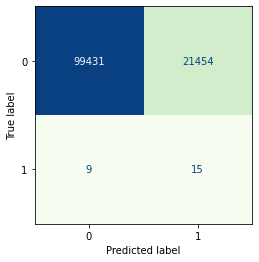

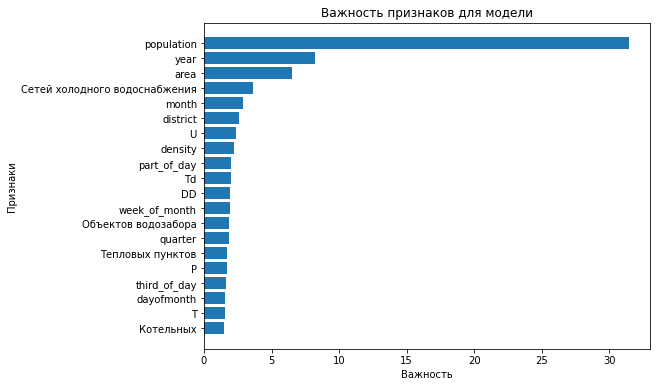

In [106]:
validation(catc, X_valid, y_valid['is_fire'])

In [107]:
fire_prediction = catc.predict_proba(X_valid)[:, 1]

In [108]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_toxic'], eval_set=(X_valid, y_valid['is_toxic']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7099654	best: 0.7099654 (0)	total: 204ms	remaining: 10m 12s
bestTest = 0.9853855968
bestIteration = 22
Shrink model to first 23 iterations.


f1_macro:  0.47758723818646703
roc_auc:  0.9853855824263076
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    120908
           1       0.00      1.00      0.00         1

    accuracy                           0.91    120909
   macro avg       0.50      0.96      0.48    120909
weighted avg       1.00      0.91      0.95    120909

Матрица ошибок: 


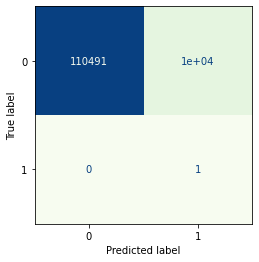

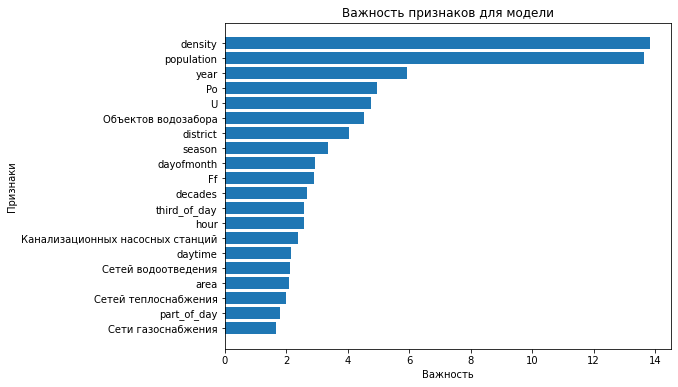

In [109]:
validation(catc, X_valid, y_valid['is_toxic'])

In [110]:
toxic_prediction = catc.predict_proba(X_valid)[:, 1]

In [116]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.01, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 3.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_bio'], eval_set=(X_valid, y_valid['is_bio']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8122351	best: 0.8122351 (0)	total: 183ms	remaining: 9m 8s
bestTest = 0.8198662698
bestIteration = 1
Shrink model to first 2 iterations.


f1_macro:  0.4651158735223429
roc_auc:  0.8198662911403922
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    120897
           1       0.00      0.67      0.00        12

    accuracy                           0.87    120909
   macro avg       0.50      0.77      0.47    120909
weighted avg       1.00      0.87      0.93    120909

Матрица ошибок: 


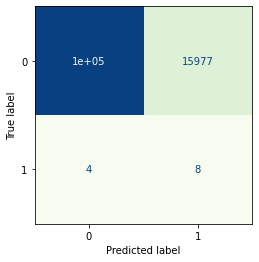

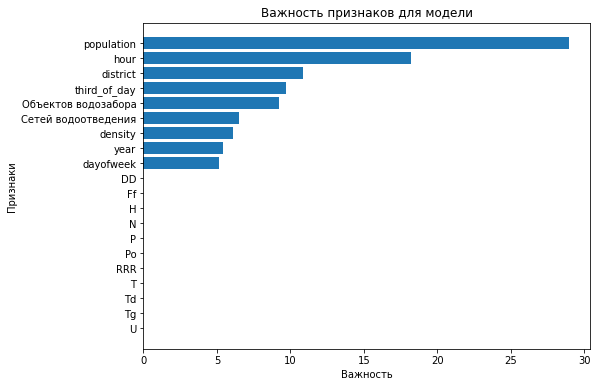

In [117]:
validation(catc, X_valid, y_valid['is_bio'])

In [118]:
bio_prediction = catc.predict_proba(X_valid)[:, 1]

In [119]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_nature'], eval_set=(X_valid, y_valid['is_nature']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9014745	best: 0.9014745 (0)	total: 207ms	remaining: 10m 19s
bestTest = 0.9311617017
bestIteration = 122
Shrink model to first 123 iterations.


f1_macro:  0.49609108579604827
roc_auc:  0.9311616980445355
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    120892
           1       0.00      0.24      0.00        17

    accuracy                           0.98    120909
   macro avg       0.50      0.61      0.50    120909
weighted avg       1.00      0.98      0.99    120909

Матрица ошибок: 


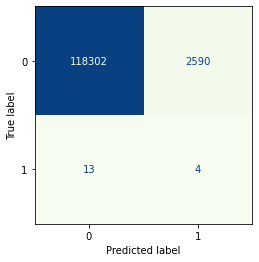

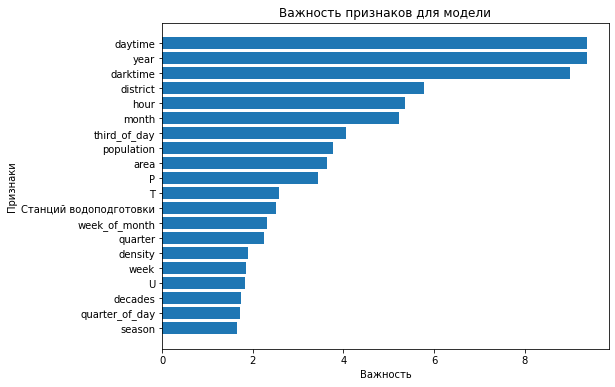

In [120]:
validation(catc, X_valid, y_valid['is_nature'])

In [121]:
nat_prediction = catc.predict_proba(X_valid)[:, 1]

In [122]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_zkh'], eval_set=(X_valid, y_valid['is_zkh']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8545627	best: 0.8545627 (0)	total: 218ms	remaining: 10m 53s
bestTest = 0.9241522849
bestIteration = 6
Shrink model to first 7 iterations.


f1_macro:  0.49542808412953726
roc_auc:  0.9241522876790136
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    120894
           1       0.00      0.33      0.00        15

    accuracy                           0.98    120909
   macro avg       0.50      0.65      0.50    120909
weighted avg       1.00      0.98      0.99    120909

Матрица ошибок: 


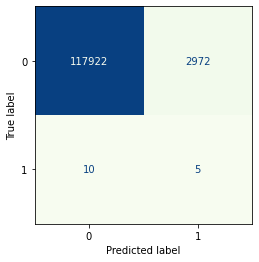

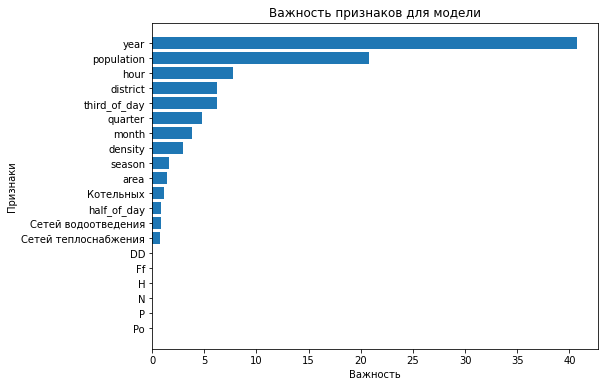

In [123]:
validation(catc, X_valid, y_valid['is_zkh'])

In [124]:
kommunal_prediction = catc.predict_proba(X_valid)[:, 1]

In [125]:
catc = CatBoostClassifier(loss_function = "Logloss", #CrossEntropy "Logloss"    eval_metric=TotalF1
                          eval_metric="AUC",  #eval_metric="F1","AUC",Precision Recall BalancedAccuracy
                          learning_rate=0.05, 
                          max_depth = 6, 
                          n_estimators = 3000, 
                          auto_class_weights='Balanced',
                          l2_leaf_reg = 5.5,
                          #bagging_temperature=0.1,
                          #colsample_bylevel=0.7,
                          #subsample=0.7,
                          leaf_estimation_iterations=1, random_state=42, task_type='GPU')
catc.fit(X_train_part, y_train_part['is_etc'], eval_set=(X_valid, y_valid['is_etc']), cat_features=cat_col,
         early_stopping_rounds = 100, use_best_model=True, verbose=500)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6704309	best: 0.6704309 (0)	total: 213ms	remaining: 10m 37s
bestTest = 0.9240656495
bestIteration = 82
Shrink model to first 83 iterations.


f1_macro:  0.5070974156411713
roc_auc:  0.9240656430703477
Отчет о классификации: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120858
           1       0.01      0.06      0.02        51

    accuracy                           1.00    120909
   macro avg       0.50      0.53      0.51    120909
weighted avg       1.00      1.00      1.00    120909

Матрица ошибок: 


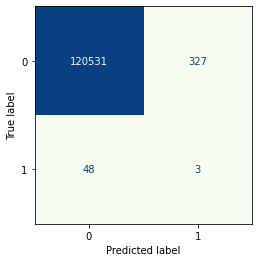

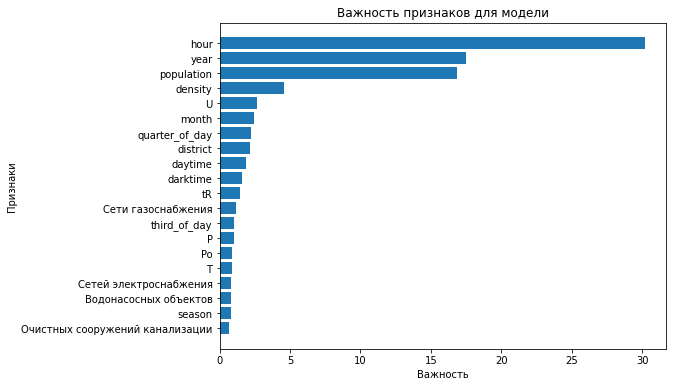

In [126]:
validation(catc, X_valid, y_valid['is_etc'])

In [127]:
ets_prediction = catc.predict_proba(X_valid)[:, 1]

In [128]:
ets_prediction

array([0.0270054 , 0.02557938, 0.0231199 , ..., 0.02221449, 0.02044832,
       0.02158922])

In [ ]:
dtp_prediction, transp_prediction, 
fire_prediction, nat_prediction, 
toxic_prediction, bio_prediction, 
kommunal_prediction, ets_prediction

In [138]:
temp = valid[['datetime', 'date', 'district', 'is_dtp', 'is_transport', 'is_fire', 'is_toxic', 'is_bio', 
              'is_nature', 'is_zkh', 'is_etc', 'geometry']]
temp

,datetime,date,district,is_dtp,is_transport,is_fire,is_toxic,is_bio,is_nature,is_zkh,is_etc,geometry
26286,2022-01-01 02:00:00,2022-01-01,Чердынский ГО,0,0,0,0,0,0,0,0,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26287,2022-01-01 05:00:00,2022-01-01,Чердынский ГО,0,0,0,0,0,0,0,0,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26288,2022-01-01 08:00:00,2022-01-01,Чердынский ГО,0,0,0,0,0,0,0,0,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26289,2022-01-01 11:00:00,2022-01-01,Чердынский ГО,0,0,0,0,0,0,0,0,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26290,2022-01-01 14:00:00,2022-01-01,Чердынский ГО,0,0,0,0,0,0,0,0,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1080819,2022-12-30 11:00:00,2022-12-30,Губахинский МО,0,0,0,0,0,0,0,0,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080820,2022-12-30 14:00:00,2022-12-30,Губахинский МО,0,0,0,0,0,0,0,0,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080821,2022-12-30 17:00:00,2022-12-30,Губахинский МО,0,0,0,0,0,0,0,0,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080822,2022-12-30 20:00:00,2022-12-30,Губахинский МО,0,0,0,0,0,0,0,0,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."


In [139]:
temp['is_dtp']=dtp_prediction
temp['is_transport']=transp_prediction
temp['is_fire']=fire_prediction
temp['is_toxic']=toxic_prediction
temp['is_bio']=bio_prediction
temp['is_nature']=nat_prediction
temp['is_zkh']=kommunal_prediction
temp['is_etc']=ets_prediction

/tmp/ipykernel_13014/2655255027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['is_dtp']=dtp_prediction
/tmp/ipykernel_13014/2655255027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['is_transport']=transp_prediction
/tmp/ipykernel_13014/2655255027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [140]:
temp

,datetime,date,district,is_dtp,is_transport,is_fire,is_toxic,is_bio,is_nature,is_zkh,is_etc,geometry
26286,2022-01-01 02:00:00,2022-01-01,Чердынский ГО,0.038114,0.350131,0.309260,0.242609,0.490820,0.017976,0.387373,0.027005,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26287,2022-01-01 05:00:00,2022-01-01,Чердынский ГО,0.050267,0.384354,0.266668,0.249623,0.490820,0.019581,0.387373,0.025579,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26288,2022-01-01 08:00:00,2022-01-01,Чердынский ГО,0.097382,0.449557,0.243370,0.227631,0.493135,0.027681,0.458672,0.023120,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26289,2022-01-01 11:00:00,2022-01-01,Чердынский ГО,0.096209,0.458650,0.256217,0.211051,0.493135,0.025570,0.458672,0.024348,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
26290,2022-01-01 14:00:00,2022-01-01,Чердынский ГО,0.080966,0.458422,0.288183,0.249397,0.493135,0.017942,0.457166,0.026544,"POLYGON ((56.4398168 59.9073522, 56.4384944 59..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1080819,2022-12-30 11:00:00,2022-12-30,Губахинский МО,0.081342,0.401526,0.258966,0.250521,0.495461,0.030047,0.446318,0.025647,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080820,2022-12-30 14:00:00,2022-12-30,Губахинский МО,0.072471,0.387956,0.378586,0.231846,0.495461,0.028362,0.444819,0.022198,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080821,2022-12-30 17:00:00,2022-12-30,Губахинский МО,0.051374,0.368453,0.398020,0.210659,0.494577,0.026908,0.430285,0.022214,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."
1080822,2022-12-30 20:00:00,2022-12-30,Губахинский МО,0.036565,0.377211,0.409785,0.219307,0.494577,0.021875,0.430285,0.020448,"POLYGON ((57.2909659 58.9386782, 57.2903003 58..."


In [143]:
temp1 = temp.groupby(['date', 'district'], as_index=False).agg(is_dtp=('is_dtp','max'),
                                                              is_transport=('is_transport','max'),
                                                              is_fire=('is_fire','max'),
                                                              is_toxic=('is_toxic','max'),
                                                              is_bio=('is_bio','max'),
                                                              is_nature=('is_nature','max'),
                                                              is_zkh=('is_zkh','max'),
                                                              is_etc=('is_etc','max'),)
temp1

,date,district,is_dtp,is_transport,is_fire,is_toxic,is_bio,is_nature,is_zkh,is_etc
0,2022-01-01,Александровский МО,0.205942,0.516660,0.384013,0.254919,0.494618,0.028219,0.464093,0.017532
1,2022-01-01,Бардымский МО,0.109217,0.442036,0.331443,0.464856,0.497479,0.043861,0.424247,0.025876
2,2022-01-01,Березовский МО,0.037185,0.366659,0.284874,0.240091,0.494618,0.029189,0.422239,0.031472
3,2022-01-01,Большесосновский МО,0.040286,0.395919,0.190088,0.249948,0.494386,0.026253,0.422239,0.029645
4,2022-01-01,Верещагинский ГО,0.135743,0.485481,0.432318,0.248262,0.495533,0.057237,0.463864,0.036856
...,...,...,...,...,...,...,...,...,...,...
15647,2022-12-30,Чердынский ГО,0.119622,0.443722,0.315093,0.278117,0.493227,0.020716,0.434650,0.023398
15648,2022-12-30,Чернушинский ГО,0.224036,0.386625,0.431628,0.640396,0.504165,0.057675,0.440542,0.045047
15649,2022-12-30,Чусовской ГО,0.339813,0.525097,0.645845,0.397517,0.496414,0.042018,0.443893,0.033778
15650,2022-12-30,Юрлинский МО,0.036444,0.304508,0.143174,0.206865,0.498153,0.016093,0.404344,0.026472


In [144]:
temp1.to_csv("predict.csv", sep=",", index=False)

In [69]:
df["is_bio"].value_counts(dropna=False, normalize=True)

0    0.999743
1    0.000257
Name: is_bio, dtype: float64